In [11]:
import pandas as pd

# Charger le fichier CSV
df = pd.read_csv('C:/Users/my.kassem/Desktop/exploratory data analysis/df_filtre_status_type_description_resolution_copy.csv')

# Afficher les premi√®res lignes du fichier
df

Key         Type  \
0      DHRD-103268     Incident   
1      DHRD-103216        Story   
2      DHRD-103195      Problem   
3      DHRD-103180          Bug   
4      DHRD-103113          Bug   
...            ...          ...   
15976    DHRD-7282          Bug   
15977    DHRD-7281  Improvement   
15978    DHRD-7280          Bug   
15979    DHRD-7279      Request   
15980    DHRD-6497          Bug   

                                                 Summary  \
0      CACEIS-PROD-IN-CP - Licence expir√©e depuis le ...   
1         TST - Manual override / Audit must be retested   
2                                    Can't Start Workers   
3        [AWS] S3 services failure with AWS_ROLE channel   
4      [Regression] : NPE raised when using the Share...   
...                                                  ...   
15976                    Import error : deadlock failure   
15977  Evolutions mineures sur l'environnement des bu...   
15978     L'icone des mails interne en attente est HS...   
15979                                            Ratings   
15980  Probleme lors de l'affichage de l'agregation d...   

                                             Description    Status Resolution  \
0      Bonjour √† tous,\r\nNous avons CACEIS qui nous ...  Resolved      Fixed   
1      Due to improvements done with¬†¬†DHRD-100447, th...      Done      Fixed   
2      ||Version details||Environment infos||\r\n| * ...  Resolved      Fixed   
3      ||Version details||Environment infos||\r\n| * ...      Done      Fixed   
4      ||Version details||Environment infos||\r\n|VER...      Done      Fixed   
...                                                  ...       ...        ...   
15976  When importing a file, the error "* Main error...    Closed      Fixed   
15977  Bizness rule:\no chercher une autre bizule en ...    Closed      Fixed   
15978  L'icone de bo√Æte mail situ√© en bas de l'√©cran ...    Closed      Fixed   
15979  Titres : \n - Les ratings c√¥t√© titre sont faux...    Closed      Fixed   
15980  XT - 26/05/2011 - Mail de Mickael et il fourni...    Closed     Closed   

                    Resolution Date  \
0      2025-01-23T10:45:39.000+0100   
1      2025-01-24T10:36:04.000+0100   
2      2025-01-22T16:24:24.000+0100   
3      2025-01-22T14:36:37.000+0100   
4      2025-01-23T09:26:04.000+0100   
...                             ...   
15976  2012-02-02T04:00:00.000+0100   
15977  2012-02-02T03:56:00.000+0100   
15978  2012-02-02T03:53:00.000+0100   
15979  2012-02-01T04:13:00.000+0100   
15980  2011-05-26T10:40:00.000+0200   

                                            Release Note Priority  \
0                                                    NaN  Blocker   
1                                                    NaN    Minor   
2                                                    NaN  Blocker   
3                                                    NaN  Blocker   
4                                                    NaN  Blocker   
...                                                  ...      ...   
15976  When importing data, the multisource module ha...      NaN   
15977  Some bugs have been fixed and various improvem...      NaN   
15978                                                NaN      NaN   
15979                                                NaN      NaN   
15980                                                NaN      NaN   

                            Created  ...      Components  \
0      2025-01-22T13:49:58.000+0100  ...       Oth/other   
1      2025-01-21T11:59:10.000+0100  ...             NaN   
2      2025-01-20T17:23:57.000+0100  ...             NaN   
3      2025-01-20T16:06:24.000+0100  ...             NaN   
4      2025-01-17T08:22:51.000+0100  ...             NaN   
...                             ...  ...             ...   
15976  2012-02-02T04:00:00.000+0100  ...        C/import   
15977  2012-02-02T03:56:00.000+0100  ...  Cor/rule dict.   
15978  2012-02-02T03:53:00.000+0100  ...  Gui/compone

In [16]:
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import HDBSCAN
import umap.umap_ as umap  # Correction pour l'import UMAP
from keybert import KeyBERT
from collections import defaultdict

In [13]:
# 1. Mod√®le d'embedding l√©ger

In [14]:
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2', device='cpu')


In [15]:
summaries = df['Summary'].tolist()  # Convertit la colonne en liste

In [17]:
embeddings = model.encode(summaries, show_progress_bar=True)


Batches: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 500/500 [01:51<00:00,  4.47it/s]


In [19]:
# √âtape 2: R√©duction de dimension avec UMAP
umap_reducer = umap.UMAP(n_components=5, metric='cosine', random_state=42)
reduced_embeddings = umap_reducer.fit_transform(embeddings)

c:\Users\my.kassem\Desktop\Intelligent_analysis_of_JIRA_tickets\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [20]:
# √âtape 3: Clustering avec HDBSCAN
clusterer = HDBSCAN(min_cluster_size=3, metric='euclidean')
clusters = clusterer.fit_predict(reduced_embeddings)

In [21]:
# √âtape 4: Extraction de mots-cl√©s par cluster avec KeyBERT
kw_model = KeyBERT()
cluster_keywords = defaultdict(list)

for cluster_id in set(clusters):
    if cluster_id != -1:  # -1 repr√©sente les points de bruit dans HDBSCAN
        cluster_texts = [text for text, c in zip(summaries, clusters) if c == cluster_id]
        keywords = kw_model.extract_keywords(" ".join(cluster_texts), keyphrase_ngram_range=(1, 2))
        cluster_keywords[cluster_id] = keywords


c:\Users\my.kassem\Desktop\Intelligent_analysis_of_JIRA_tickets\.venv\lib\site-packages\huggingface_hub\file_download.py:144: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\my.kassem\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [23]:
from pprint import pprint

print("üìä Topics et Mots-Cl√©s par Cluster üìä")
print("="*50)
for cluster_id, keywords in cluster_keywords.items():
    print(f"\nüîµ Cluster {cluster_id} - Mots-Cl√©s:")
    pprint([kw[0] for kw in keywords])  # Affiche seulement les termes, pas les scores
    
    # Affiche 3 exemples repr√©sentatifs
    cluster_samples = [text for text, c in zip(summaries, clusters) if c == cluster_id][:3]
    print("\nExemples de tickets:")
    for i, sample in enumerate(cluster_samples, 1):
        print(f"{i}. {sample}")
    print("-"*50)

üìä Topics et Mots-Cl√©s par Cluster üìä

üîµ Cluster 0 - Mots-Cl√©s:
['vulnerability okio',
 'vulnerability ocbc',
 'vulnerability 11396',
 'vulnerability 11495',
 'vulnerability 14534']

Exemples de tickets:
1. DataHub - Spring core Vulnerability 
2. [OCBC] Blackduck High Vulnerability - Netty 4.1.100.Final
3. High vulnerability in okio-2.10.0.jar
--------------------------------------------------

üîµ Cluster 1 - Mots-Cl√©s:
['id cards', 'idcards implement', 'idcard idcards', 'idcards enable', 'idcard']

Exemples de tickets:
1. Ability to display ID Cards
2. Impossible de passer d'Id Card √† grille
3. ID Card - make all cards clickable
--------------------------------------------------

üîµ Cluster 2 - Mots-Cl√©s:
['exports csv', 'csv export', 'export csv', 'export csv1203', 'import csv']

Exemples de tickets:
1. [TBF] Import csv simulation
2. SKIP_FOOT_LINES doesn't skip the number of records expected for CSV parser
3. CITICS - Csv file import can not process value which has s

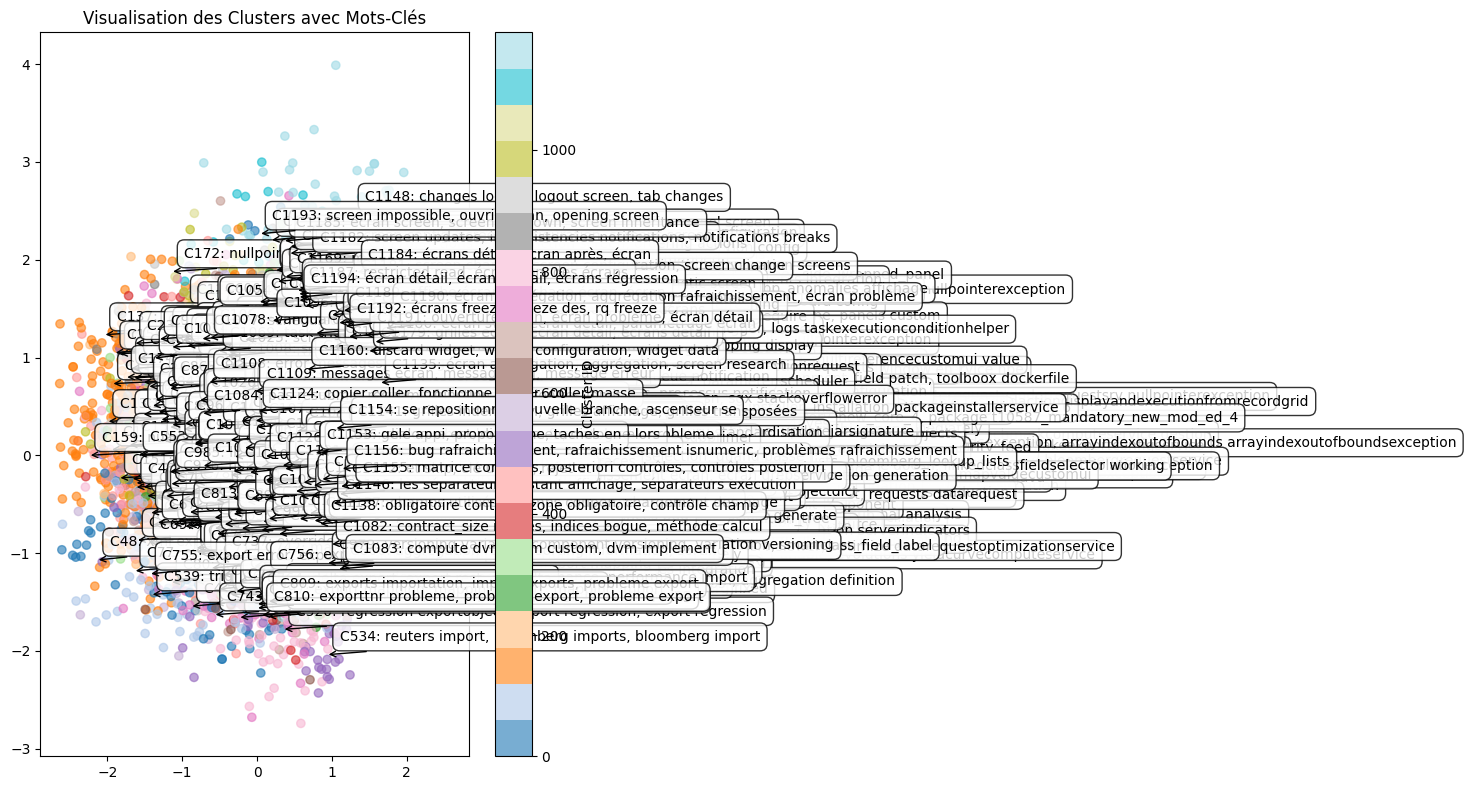

In [25]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# R√©duction dimensionnelle pour la visualisation
pca = PCA(n_components=2)
coords = pca.fit_transform(embeddings)

plt.figure(figsize=(12, 8))

# Couleurs par cluster
colors = [plt.cm.tab20(c) for c in clusters if c != -1]
filtered_coords = coords[[c != -1 for c in clusters]]

# Scatter plot
scatter = plt.scatter(
    filtered_coords[:, 0], 
    filtered_coords[:, 1], 
    c=[c for c in clusters if c != -1],
    cmap='tab20',
    alpha=0.6
)

# Annotations des mots-cl√©s
for cluster_id in cluster_keywords.keys():
    # Position moyenne du cluster
    cluster_points = coords[clusters == cluster_id]
    mean_pos = cluster_points.mean(axis=0)
    
    # Top 3 mots-cl√©s
    top_keywords = ", ".join([kw[0] for kw in cluster_keywords[cluster_id][:3]])
    
    plt.annotate(
        f"C{cluster_id}: {top_keywords}",
        xy=mean_pos,
        xytext=(10, 10),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='white', alpha=0.8),
        arrowprops=dict(arrowstyle='->')
    )

plt.colorbar(scatter, label='Cluster ID')
plt.title("Visualisation des Clusters avec Mots-Cl√©s")
plt.tight_layout()
plt.show()

In [26]:
unique_clusters = set(clusters)  # Ensemble des IDs de clusters
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)  # Exclut les outliers

print(f"üî∑ Nombre total de clusters identifi√©s : {num_clusters}")
print(f"üî∂ Nombre de tickets non-clusteris√©s (outliers) : {list(clusters).count(-1)}")
print(f"üìä R√©partition par cluster :\n{pd.Series(clusters).value_counts().sort_index()}")

üî∑ Nombre total de clusters identifi√©s : 1195
üî∂ Nombre de tickets non-clusteris√©s (outliers) : 5232
üìä R√©partition par cluster :
-1       5232
 0         16
 1         11
 2         64
 3          3
         ... 
 1190       8
 1191      13
 1192       3
 1193       5
 1194      13
Name: count, Length: 1196, dtype: int64


In [27]:
unique_clusters = set(clusters)  # Ensemble des IDs de clusters
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)  # Exclut les outliers

print(f"üî∑ Nombre total de clusters identifi√©s : {num_clusters}")
print(f"üî∂ Nombre de tickets non-clusteris√©s (outliers) : {list(clusters).count(-1)}")
print("\nüìä D√©tail des clusters avec leurs noms :")

# Cr√©ation d'un DataFrame pour l'affichage structur√©
cluster_info = []
for cluster_id in sorted(unique_clusters):
    if cluster_id == -1:
        continue  # On ignore les outliers pour cette partie
    
    # R√©cup√©ration des mots-cl√©s principaux
    top_keywords = [kw[0] for kw in cluster_keywords.get(cluster_id, [])[:3]]
    cluster_name = " / ".join(top_keywords)  # Combine les 3 premiers mots-cl√©s
    
    cluster_info.append({
        "Cluster ID": cluster_id,
        "Nom du Cluster": cluster_name,
        "Nombre de tickets": list(clusters).count(cluster_id),
        "Mots-cl√©s": ", ".join(top_keywords)
    })

# Affichage sous forme de tableau
import pandas as pd
df_clusters = pd.DataFrame(cluster_info)
print(df_clusters[["Cluster ID", "Nom du Cluster", "Nombre de tickets"]].to_string(index=False))

# Version alternative avec print standard
print("\nüìå Version d√©taill√©e :")
for info in cluster_info:
    print(f"\n‚óè Cluster {info['Cluster ID']} - \"{info['Nom du Cluster']}\"")
    print(f"  Tickets: {info['Nombre de tickets']}")
    print(f"  Mots-cl√©s complets: {info['Mots-cl√©s']}")

üî∑ Nombre total de clusters identifi√©s : 1195
üî∂ Nombre de tickets non-clusteris√©s (outliers) : 5232

üìä D√©tail des clusters avec leurs noms :
 Cluster ID                                                                                                                                                     Nom du Cluster  Nombre de tickets
          0                                                                                                      vulnerability okio / vulnerability ocbc / vulnerability 11396                 16
          1                                                                                                                      id cards / idcards implement / idcard idcards                 11
          2                                                                                                                              exports csv / csv export / export csv                 64
          3                                                             

In [28]:
import pandas as pd
from IPython.display import display, HTML

# Cr√©ation d'un DataFrame complet
df_clusters = pd.DataFrame({
    'Cluster': clusters,
    'Summary': summaries
})

# Ajout des noms de clusters
cluster_names = {row['Cluster ID']: row['Nom du Cluster'] 
                for row in cluster_info}
df_clusters['Nom_Cluster'] = df_clusters['Cluster'].map(cluster_names)

In [ ]:
from ipywidgets import interact, IntSlider

def show_cluster(cluster_id=-2, page=1, page_size=10):
    if cluster_id == -2:  # Vue globale
        display(HTML("<h2>Vue Globale des Clusters</h2>"))
        display(df_clusters['Nom_Cluster'].value_counts().to_frame('Nombre de tickets'))
    else:
        cluster_data = df_clusters[df_clusters['Cluster'] == cluster_id]
        total = len(cluster_data)
        start = (page-1)*page_size
        end = min(start + page_size, total)
        
        display(HTML(f"""
        <h2>Cluster {cluster_id} - {cluster_names.get(cluster_id, 'Outlier')}</h2>
        <p>Affichage des tickets {start+1}-{end} sur {total}</p>
        """))
        display(cluster_data.iloc[start:end][['Summary']])

# Interface interactive
interact(
    show_cluster,
    cluster_id=[-2] + sorted(df_clusters['Cluster'].unique()),
    page=IntSlider(min=1, max=100, step=1, value=1),
    page_size=[10, 20, 50, 100]
)